In [18]:
import pandas as pd
import numpy as np
import sys
import os
import plotly.express as px

sys.path.append(os.path.abspath(".."))
import collections2batches as c2b

In [2]:
FOLDER_PATH = r"C:\Users\borge\Documents\ex_extracta\downloaded"
base_dir = os.path.dirname(FOLDER_PATH)
FILE_PATH = os.path.join(os.path.dirname(FOLDER_PATH), "planilha do banco de dados.ods")
output_path_images = os.path.join(os.path.dirname(FOLDER_PATH), "images")
output_path_batches = os.path.join(os.path.dirname(FOLDER_PATH), "batches")
FOLDER_PATH

'C:\\Users\\borge\\Documents\\ex_extracta\\downloaded'

In [5]:
cenabiodb_merged

NameError: name 'cenabiodb_merged' is not defined

In [7]:
appSampleTPlant = pd.read_csv("downloaded/appSampleTPlant_1384151563.txt", sep="\t")
display (appSampleTPlant.head(2))

appSampleTrack = pd.read_csv("downloaded/appSampleTrack_1384157081.txt", sep="\t",
    on_bad_lines='skip')  # Ignora linhas com número de colunas irregular)
display(appSampleTrack.head(2))

appSampleCompound = pd.read_csv("downloaded/appSampleCompound_1384157249.txt", sep="\t")
display (appSampleCompound.head(2))

appTPlant = pd.read_csv("downloaded/appTPlant_1384151712.txt", sep="\t")
display (appTPlant.head(2))

# Join (merge) com base na coluna 'tplantid' e opeid
appSampleTPlant["Reg Planta"] = appSampleTPlant["Reg Planta"].astype(str)
appTPlant["Reg TPlanta"] = appTPlant["Reg TPlanta"].astype(str)

cenabiodb_merged = pd.merge(
    appSampleTPlant,
    appTPlant,
    left_on="Reg Planta",
    right_on="Reg TPlanta",
    how="right"
)
display(cenabiodb_merged.head(2))

cenabiodb_merged_filt = cenabiodb_merged[["Reg Amostra", "Reg Planta", "Família", "Gênero", "Espécies", "Comum", "Nome do Herbário"]]
print(cenabiodb_merged_filt.shape)

cenabiodb_merged2 = pd.merge(
    cenabiodb_merged,
    appSampleTrack,
    left_on="Reg Amostra",
    right_on="Reg Amostra",
    how="right"
)
cenabiodb_merged2_filt = cenabiodb_merged2[["Reg Amostra", "Reg Planta", "Família", "Gênero", "Espécies", 
                                            "Comum", "Nome do Herbário",
                                           "Câmara Fria", "Armário", "Gaveta", "Coluna", "Linha", "Cor da tampa"]]
print(cenabiodb_merged2_filt.shape)

cenabiodb_merged2_filt2 = cenabiodb_merged2_filt["Reg Amostra"].isna().sum()
print(f"quantos NaN em 'Reg Amostra' {cenabiodb_merged2_filt}")

cenabiodb_merged2_filt2 = cenabiodb_merged2_filt.dropna(subset=["Reg Amostra"])
print(cenabiodb_merged2_filt2.shape)

,Reg Amostra,Reg Expedição,Reg Planta,Orgão,Peso,Cor,Cheiro,Comentários,Ativo,Criado por,Data de criação,Editado por,Data de edição
0,100000,100000,100000,Leaf,1140,lt green,NaN,NaN,Sim,gloria,"1 Mar, 2000",ane,"30 Jun, 2000"
1,100002,100000,100001,Plant,545,NaN,NaN,A amostra foi descartada no ato do recebimento.,NaN,NaN,NaN,NaN,NaN


,Localização,Reg Amostra,Câmara Fria,Armário,Gaveta,Coluna,Linha,Cor da tampa,Volume corrente (ml),Massa seca inicial (mg),Concentração (mg/ml),Aparência,Comentários,Histórico,Data de criação
0,1-1-1-A1,111804,1,1.0,1.0,A,1.0,1.0,NaN,NaN,NaN,NaN,NaN,[2001-12-10 10:54] ane inicializou o rastreado...,"10 Dez, 2001"
1,1-1-1-A2,111069,1,1.0,1.0,A,2.0,2.0,NaN,NaN,NaN,NaN,NaN,[2001-12-10 10:55] ane inicializou o rastreado...,"10 Dez, 2001"


,Reg Amostra,Reg Amostra Origem,Operador,Data de Isolamento,Depositante,Observações,Ativo,Determinação de Pureza,Quantidade,Volume de Armazenamento,Solvente de Armazenamento,Peso Molecular,Fórmula Molecular,Nome Comum,Nome IUPAC,Smiles
0,133814,126147,Benevides,"13 Jun, 2002",Extracta,Composto obtido por fracionamento em cromatopl...,Sim,"CCF, Rf= 0,583 Eluente Tolueno: MeOH 98:2 + 20...",1.2,1.0,CHCl3,400.0,NaN,NaN,NaN,NaN
1,133815,126147,Benevides,"13 Jun, 2002",Extracta,Composto obtido por fracionamento em cromatopl...,Sim,"CCF, Rf= 0,5 Eluente Tolueno: MeOH 98:2 + 20 g...",1.4,1.0,CHCl3,400.0,NaN,NaN,NaN,NaN


,Reg TPlanta,Numero da ficha,Data da coleta,Latitude,Longitude,Altitude,Informação sobre Mapa,Solo,Formação vegetal,Família,...,Frequência,Hábito,Altura,Diâmetro,Informação Etnológica,Comentários,Identificador,Nome do Herbário,Data de depósito,Numero de Depósito
0,100000,1,"25 Fev, 2000",22° 39.716´ S,43° 4.216´ O,5.0,NaN,Argila,8.0,Solanaceae,...,2.0,3.0,1.5,NaN,NaN,As flores desta planta são de coloração roxa.,Alexandre Quinet,IB-UFRJ (RFA),"27 Abr, 2000",24055
1,100001,2,"25 Fev, 2000",22° 39.716´ S,43° 4.216´ O,8.0,NaN,Argila,3.0,Sapindaceae,...,1.0,6.0,NaN,NaN,NaN,As flores desta planta são de coloração castanha.,NaN,NaN,NaN,NaN


,Reg Amostra,Reg Expedição,Reg Planta,Orgão,Peso,Cor,Cheiro,Comentários_x,Ativo,Criado por,...,Frequência,Hábito,Altura,Diâmetro,Informação Etnológica,Comentários_y,Identificador,Nome do Herbário,Data de depósito,Numero de Depósito
0,100000,100000,100000,Leaf,1140,lt green,NaN,NaN,Sim,gloria,...,2.0,3.0,1.5,NaN,NaN,As flores desta planta são de coloração roxa.,Alexandre Quinet,IB-UFRJ (RFA),"27 Abr, 2000",24055
1,100002,100000,100001,Plant,545,NaN,NaN,A amostra foi descartada no ato do recebimento.,NaN,NaN,...,1.0,6.0,NaN,NaN,NaN,As flores desta planta são de coloração castanha.,NaN,NaN,NaN,NaN


(17136, 7)
(232757, 13)
quantos NaN em 'Reg Amostra'        Reg Amostra Reg Planta      Família    Gênero Espécies  \
0           111804        NaN          NaN       NaN      NaN   
1           111069        NaN          NaN       NaN      NaN   
2           111788        NaN          NaN       NaN      NaN   
3           111776        NaN          NaN       NaN      NaN   
4           111173        NaN          NaN       NaN      NaN   
...            ...        ...          ...       ...      ...   
232752      108119     103438          NaN       NaN      NaN   
232753      106177     102602     Fabaceae       NaN      NaN   
232754      107883     103332    Rubiaceae    Randia   armata   
232755      108126     103441  Apocynaceae  Thevetia      NaN   
232756      106938     102911  Sapindaceae       NaN      NaN   

                    Comum Nome do Herbário Câmara Fria  Armário  Gaveta  \
0                     NaN              NaN           1      1.0     1.0   
1               

In [66]:
cenabiodb_merged2_filt

,Reg Amostra,Reg Planta,Família,Gênero,Espécies,Comum,Nome do Herbário,Câmara Fria,Armário,Gaveta,Coluna,Linha,Cor da tampa
0,111804,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,1.0,1.0
1,111069,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,2.0,2.0
2,111788,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,3.0,3.0
3,111776,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,4.0,4.0
4,111173,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232752,108119,103438,NaN,NaN,NaN,Folha Dura,NaN,1,3.0,40.0,R,3.0,3.0
232753,106177,102602,Fabaceae,NaN,NaN,Arranha Gato Rego,IB-UFRJ (RFA),1,3.0,40.0,R,4.0,4.0
232754,107883,103332,Rubiaceae,Randia,armata,NaN,IB-UFRJ (RFA),1,3.0,40.0,R,5.0,5.0
232755,108126,103441,Apocynaceae,Thevetia,NaN,Leiteira Amarela,NaN,1,3.0,40.0,R,6.0,6.0


In [8]:
print(f"appSampleTPlant: {appSampleTPlant.shape}")
print(f"appSampleTrack: {appSampleTrack.shape}")
print(f"appTPlant: {appTPlant.shape}")
print(f"cenabiodb_merged: {cenabiodb_merged.shape}")
print(f"cenabiodb_merged2_filt2 (Reg Amostra): {cenabiodb_merged2_filt2.shape}")

appSampleTPlant: (12926, 13)
appSampleTrack: (25353, 15)
appTPlant: (10384, 25)
cenabiodb_merged: (17136, 38)
cenabiodb_merged2_filt2 (Reg Amostra): (25315, 13)


In [9]:
print(appSampleTPlant.shape)
appSampleTPlant.head(2)

(12926, 13)


,Reg Amostra,Reg Expedição,Reg Planta,Orgão,Peso,Cor,Cheiro,Comentários,Ativo,Criado por,Data de criação,Editado por,Data de edição
0,100000,100000,100000,Leaf,1140,lt green,NaN,NaN,Sim,gloria,"1 Mar, 2000",ane,"30 Jun, 2000"
1,100002,100000,100001,Plant,545,NaN,NaN,A amostra foi descartada no ato do recebimento.,NaN,NaN,NaN,NaN,NaN


In [10]:
print(appTPlant.shape)
appTPlant.head(2)

(10384, 25)


,Reg TPlanta,Numero da ficha,Data da coleta,Latitude,Longitude,Altitude,Informação sobre Mapa,Solo,Formação vegetal,Família,...,Frequência,Hábito,Altura,Diâmetro,Informação Etnológica,Comentários,Identificador,Nome do Herbário,Data de depósito,Numero de Depósito
0,100000,1,"25 Fev, 2000",22° 39.716´ S,43° 4.216´ O,5.0,NaN,Argila,8.0,Solanaceae,...,2.0,3.0,1.5,NaN,NaN,As flores desta planta são de coloração roxa.,Alexandre Quinet,IB-UFRJ (RFA),"27 Abr, 2000",24055
1,100001,2,"25 Fev, 2000",22° 39.716´ S,43° 4.216´ O,8.0,NaN,Argila,3.0,Sapindaceae,...,1.0,6.0,NaN,NaN,NaN,As flores desta planta são de coloração castanha.,NaN,NaN,NaN,NaN


In [11]:
print(appSampleTrack.shape)
appSampleTrack.head(2)

(25353, 15)


,Localização,Reg Amostra,Câmara Fria,Armário,Gaveta,Coluna,Linha,Cor da tampa,Volume corrente (ml),Massa seca inicial (mg),Concentração (mg/ml),Aparência,Comentários,Histórico,Data de criação
0,1-1-1-A1,111804,1,1.0,1.0,A,1.0,1.0,NaN,NaN,NaN,NaN,NaN,[2001-12-10 10:54] ane inicializou o rastreado...,"10 Dez, 2001"
1,1-1-1-A2,111069,1,1.0,1.0,A,2.0,2.0,NaN,NaN,NaN,NaN,NaN,[2001-12-10 10:55] ane inicializou o rastreado...,"10 Dez, 2001"


In [12]:
cenabiodb_merged2_filt

,Reg Amostra,Reg Planta,Família,Gênero,Espécies,Comum,Nome do Herbário,Câmara Fria,Armário,Gaveta,Coluna,Linha,Cor da tampa
0,111804,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,1.0,1.0
1,111069,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,2.0,2.0
2,111788,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,3.0,3.0
3,111776,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,4.0,4.0
4,111173,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,A,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232752,108119,103438,NaN,NaN,NaN,Folha Dura,NaN,1,3.0,40.0,R,3.0,3.0
232753,106177,102602,Fabaceae,NaN,NaN,Arranha Gato Rego,IB-UFRJ (RFA),1,3.0,40.0,R,4.0,4.0
232754,107883,103332,Rubiaceae,Randia,armata,NaN,IB-UFRJ (RFA),1,3.0,40.0,R,5.0,5.0
232755,108126,103441,Apocynaceae,Thevetia,NaN,Leiteira Amarela,NaN,1,3.0,40.0,R,6.0,6.0


Gráficos salvos em C:\Users\borge\Documents\ex_extracta\images
Gráficos salvos em C:\Users\borge\Documents\ex_extracta\images
Gráfico salvo em C:\Users\borge\Documents\ex_extracta\images\sunburst_familia_genero.html


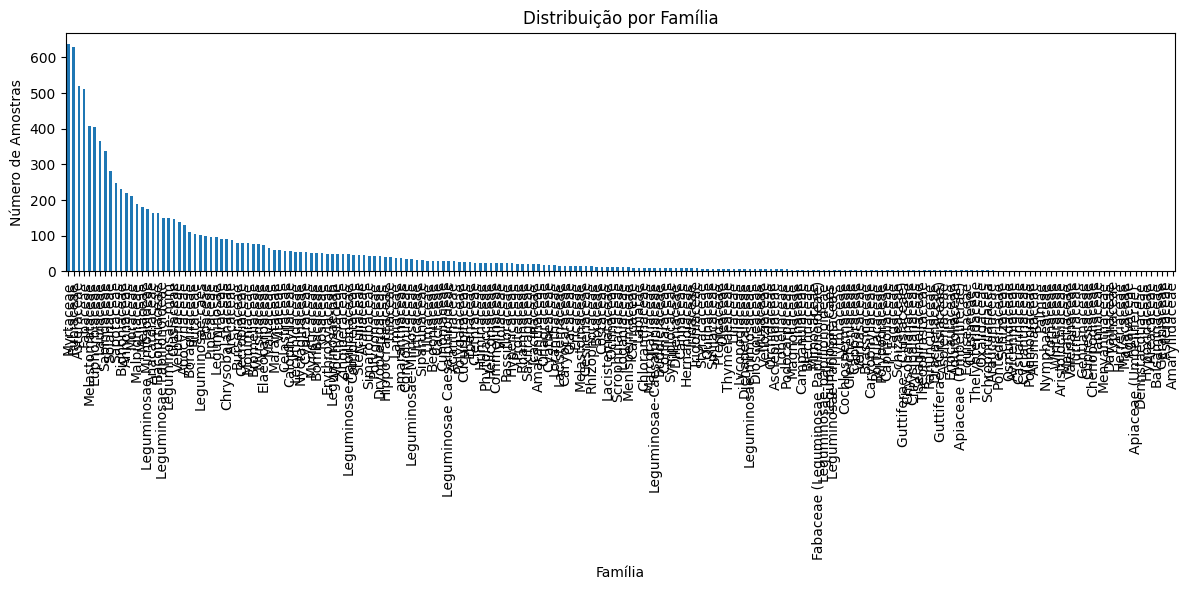

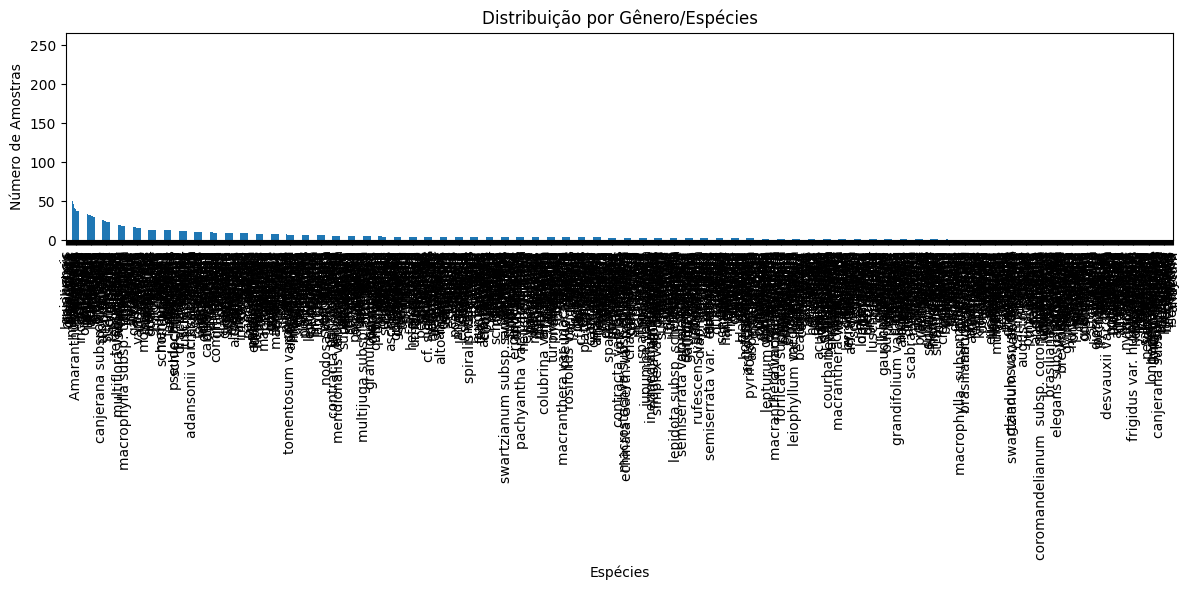

In [14]:
c2b.plot_bar_familia(cenabiodb_merged2_filt, output_dir=output_path_images)
c2b.plot_bar_genero(cenabiodb_merged2_filt, output_dir=output_path_images)
c2b.plot_sunburst_familia_genero(cenabiodb_merged2_filt, output_dir=output_path_images)

✅ A estratificação por "Família" dentro da função criar_batches_customizados serve para:

    Distribuir as amostras de forma proporcional ao número de amostras de cada família botânica no dataframe original, dentro de cada batch.
    
    ** Isso náo da certo pela quantidade de grupos taxonömicos. Representatividade homogënia seria imposs[ivel
    

In [15]:
batches = c2b.criar_batches_por_familia_genero(
    data=cenabiodb_merged2_filt,
    output_path="downloaded/batches_hierarquicos",
    samples_per_batch=80,
    qc_samples=['Blank', 'QC_Inter_Batch', 'QC_Intra_Batch'],
    qc_structure=[1, 1, 1],
    batch_structure=[24, 24,32],
    family_col='Família',
    genero_col='Gênero'
)

107 batches criados em 'downloaded/batches_hierarquicos' agrupando por Família e Gênero.


In [19]:
resumo_df = c2b.gerar_resumo_composicao(batches, output_path="downloaded/batches_hierarquicos")
#resumo_df

plot_output_dir = "downloaded/images_batches_hierarquicos"
os.makedirs(plot_output_dir, exist_ok=True)

for df in batches:
    batch_name = df['Batch'].iloc[0]
    df_amostras = df[df['Tipo'] == 'Amostra'].copy()

    # Preencher valores vazios nas hierarquias
    df_amostras['Família'] = df_amostras['Família'].fillna("Não especificado")
    df_amostras['Gênero'] = df_amostras['Gênero'].fillna("Não especificado")
    df_amostras['Espécies'] = df_amostras['Espécies'].replace('', None).fillna("Não especificado")

    fig = px.sunburst(
        df_amostras,
        path=['Família', 'Gênero', 'Espécies'],
        title=f'Distribuição por Família, Gênero e Espécies - {batch_name}',
        width=700,
        height=700
    )
    
    fig.write_html(os.path.join(plot_output_dir, f"{batch_name}_sunburst.html"))